# Sample split comparison
This notebook simply plot the results of the sample split analysis
included in the supplementary

In [1]:
import os
import pickle
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import math
from matplotlib.backends.backend_agg import FigureCanvasAgg

import sys
sys.path.append('..')
from AllFnc.utilities import GetLearningRateString

import warnings 
warnings.filterwarnings('ignore',category=FutureWarning)

sns.set_style("darkgrid")
sns.set_palette("colorblind")

In [2]:
def get_best_conf(task):
    if task == 'eye':
        model = 'shn'
        pipe = 'flt'
    elif task == 'mmi':
        model = 'dcn'
        pipe = 'flt'
    elif task == 'pds':
        model = 'fbc'
        pipe = 'ica'
    elif task == 'alz':
        model = 'shn'
        pipe = 'isr'
    elif task == 'slp':
        model = 'fbc'
        pipe = 'isr'
    elif task == 'fep':
        model = 'shn'
        pipe = 'flt'
    return model, pipe

def get_subj_fold(task):
    task_folder = {
        'eye': 'Eoec', 'mmi': 'MI', 'pds': 'PD',
        'alz': 'Alz', 'slp': 'Sleep', 'fep': 'FEP'
    }
    return task_folder.get(task) + 'Classification/Results/'

In [3]:
metric = 'accuracy_weighted'
root_path = '/home/delpup/EEG_SSL_Project/eegprepro/'
task = ['eye','mmi','pds','alz','slp','fep']
conf = ['subject split','sample split']
performances = {i: {} for i in task}
for i in task:
    for j in range(2):
        model, pipe = get_best_conf(i)
        if j == 0:
            path = root_path + get_subj_fold(i)
            file_name = '_'.join(
                [i, pipe, '125', model, '*', GetLearningRateString(model, i),
                 '061_004.pickle']
            )
        else:
            path = root_path + 'Supplementary/Results/'
            file_name = '_'.join(
                [i, pipe, '125', model, '*', GetLearningRateString(model, i),
                 '061_004.pickle']
            )
        file_names = glob.glob(path + file_name)
        if len(file_names) > 0:
            new_key = conf[j]
            performances[i][new_key] = [None]*len(file_names)
            for n, f in enumerate(file_names):
                with open(f, 'rb') as file:
                    performances[i][new_key][n] = pickle.load(file)[metric]


In [4]:
df = 0
cdf = 0
for n, i in enumerate(task):
    for m, j in enumerate(performances[i].keys()):
        print(i, j, len(performances[i][j]))
        if len(performances[i][j]) <= 50:
            df = pd.DataFrame(performances[i][j], columns=['Value']).assign(Models=i).assign(Pipelines=j)
            if n+m==0:
                cdf = df
            else:
                try:
                    cdf = pd.concat([cdf, df])
                except:
                    cdf = df
cdf = cdf.dropna(axis=1)
cdf.iloc[:,0]*=100
print(cdf.shape)
cdf.head()

eye subject split 50
eye sample split 50
mmi subject split 50
mmi sample split 50
pds subject split 50
pds sample split 50
alz subject split 50
alz sample split 50
slp subject split 50
slp sample split 50
fep subject split 50
fep sample split 50
(600, 3)


,Value,Models,Pipelines
0,100.000000,eye,subject split
1,99.888889,eye,subject split
2,100.000000,eye,subject split
3,100.000000,eye,subject split
4,100.000000,eye,subject split


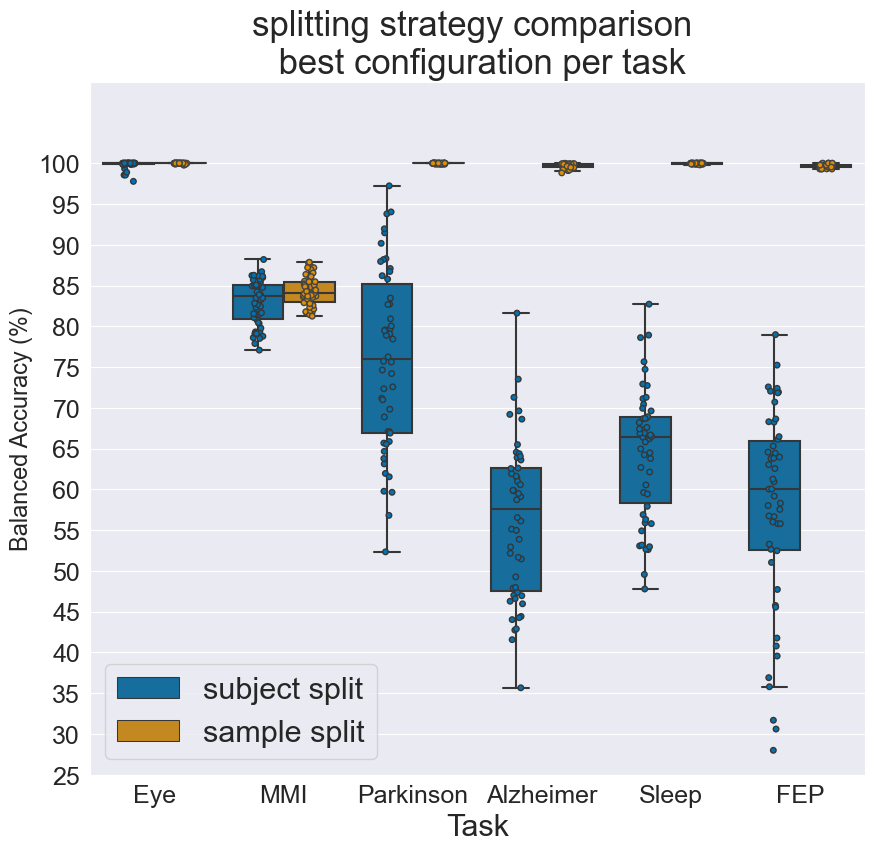

In [5]:
font = 22
fig, ax = plt.subplots(figsize=(10, 9))
sns.boxplot(x='Models', y= 'Value', hue='Pipelines',
            data=cdf, showfliers = False, ax=ax)  # RUN PLOT 
sns.stripplot(x='Models', y='Value', data=cdf, legend = False, linewidth=1,
              hue='Pipelines', dodge=True, ax=ax, size=4)
ax.set_yticks([i*5 for i in range(8 if task[0] == 'pds' else 0, 21)])
ax.set_yticklabels(np.arange(0,105,5),fontsize = font-4)
ax.set_xticklabels(['Eye', 'MMI', 'Parkinson', 'Alzheimer', 'Sleep', 'FEP'],fontsize = font-4)
ax.set_title( 'splitting strategy comparison \n best configuration per task',fontsize = font+3)
ax.set_xlabel('Task', fontsize = font)
ax.set_ylabel('Balanced Accuracy (%)', fontsize = font-5)
ax.set_ylim(25,110)
ax.legend(fontsize = font, loc="lower left")

fig.savefig('Images/splitting_comparison.pdf', transparent=False, bbox_inches='tight')

plt.show()